# Scikit-Learn

## Exploratory analysis

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import (
    datasets,
    decomposition,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
%config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.6.x

1.7.2


---

### Classification (digits)

Let's look at the classification model performance in terms of precision and recall.

#### Data loading

https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset

In [ ]:
digits = datasets.load_digits()

In [ ]:
# Flatten the images
n_samples = len(digits.images)
print(digits.images.shape)

data = digits.images.reshape([n_samples, -1])

print(data.shape, digits.target.shape)

(1797, 8, 8)
(1797, 64) (1797,)


In [ ]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

Randomly select the training and test dataset.

<span style="color:red">Implement your solution below</span>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.25, random_state=21)

#### Train the models

Train the model using, e.g., the [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

<span style="color:red">Implement your solution below</span>

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### Evaluate

Evaluate with the [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Then give a more complete result, including precision, recall and f1-score with the method [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

<span style="color:red">Implement your solution below</span>

In [ ]:
score = round(accuracy_score(y_test, y_pred), 2)
print(f"{score}")

0.83


#### Confusion matrix

Use the class [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
to display the confusion matrix.

Briefly comment on the results.

Note that the `.confusion_matrix` attribute of the created object allows to obtain the confusion matrix in the form of an array.

<span style="color:red">Implement your solution below</span>

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[40,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  2,  4,  6],
       [ 0,  2, 24,  0,  0,  0,  0,  0, 13,  0],
       [ 0,  0,  1, 35,  0,  0,  0,  2, 12,  1],
       [ 1,  0,  1,  0, 34,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  1,  0, 49,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  1,  1,  1,  0,  1,  0,  2, 47,  0],
       [ 0,  1,  0,  1,  3,  0,  0,  4,  7, 20]])

#### Error visualization

Identify the most confusing cases.

Identify misclassified instances for the lowest f1-scoring cipher class and visualize them with the code below.

You may use the function [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to find the index of the concerned instances.

In [ ]:
def plot_digit(idx, xs, ys=None, pred_ys=None):
    if ys is not None:
        print(f"Digit value:\t{ys[idx]}")
    if pred_ys is not None:
        print(f"Prediction:\t{pred_ys[idx]}")

    plt.figure(figsize=(3, 3))
    plt.imshow(
        xs[idx].reshape(8, -1),
        cmap=plt.cm.gray_r,
        interpolation="nearest",
    )

<span style="color:red">Implement your solution below</span>

In [ ]:
y_pred

array([6, 1, 1, 7, 4, 5, 8, 5, 0, 1, 4, 8, 6, 9, 2, 3, 8, 8, 3, 2, 8, 8,
       3, 5, 7, 5, 5, 7, 0, 3, 2, 7, 8, 6, 5, 4, 3, 7, 4, 7, 3, 9, 0, 8,
       8, 8, 0, 8, 5, 5, 8, 7, 6, 8, 5, 5, 2, 9, 0, 4, 8, 8, 8, 2, 4, 5,
       5, 2, 2, 8, 5, 8, 2, 8, 3, 0, 7, 1, 5, 4, 0, 0, 4, 8, 9, 8, 5, 3,
       0, 3, 0, 2, 3, 8, 4, 3, 4, 6, 8, 4, 5, 1, 3, 7, 1, 8, 0, 1, 5, 4,
       5, 4, 4, 8, 3, 0, 7, 0, 8, 5, 2, 6, 7, 6, 6, 3, 0, 0, 7, 7, 0, 2,
       8, 3, 2, 7, 0, 1, 9, 2, 5, 5, 8, 3, 5, 2, 3, 8, 8, 4, 8, 7, 9, 5,
       7, 6, 8, 8, 6, 1, 1, 4, 8, 0, 7, 7, 8, 1, 8, 5, 0, 7, 4, 7, 6, 7,
       5, 1, 9, 6, 3, 0, 5, 7, 6, 7, 2, 8, 4, 0, 1, 4, 1, 6, 7, 9, 8, 5,
       9, 0, 7, 7, 5, 3, 9, 7, 4, 2, 9, 5, 0, 9, 8, 7, 7, 7, 0, 2, 9, 6,
       5, 7, 7, 4, 7, 1, 6, 1, 6, 8, 1, 8, 0, 4, 5, 8, 7, 1, 3, 5, 1, 7,
       8, 0, 0, 6, 0, 8, 5, 6, 7, 6, 8, 5, 1, 4, 3, 6, 1, 9, 8, 8, 7, 6,
       2, 5, 2, 7, 7, 9, 5, 0, 8, 8, 8, 6, 1, 7, 6, 8, 4, 3, 1, 8, 7, 0,
       4, 6, 7, 2, 8, 3, 8, 9, 7, 0, 7, 5, 6, 5, 4,

In [ ]:
index = np.where(y_pred != y_test)
index

(array([  3,   6,  11,  17,  21,  32,  40,  43,  44,  47,  53,  60,  61,
         71,  73,  82,  84,  86,  93, 101, 103, 113, 120, 128, 132, 135,
        137, 150, 154, 156, 157, 168, 195, 204, 205, 215, 217, 224, 230,
        231, 233, 235, 241, 255, 260, 267, 268, 269, 272, 273, 283, 288,
        313, 316, 318, 319, 324, 326, 331, 350, 355, 362, 366, 371, 372,
        380, 387, 403, 404, 408, 410, 420, 425, 430, 431, 432]),)

In [ ]:
X_test.shape

(450, 64)

In [ ]:
y_test.shape

(450,)

Total misclassified: 76



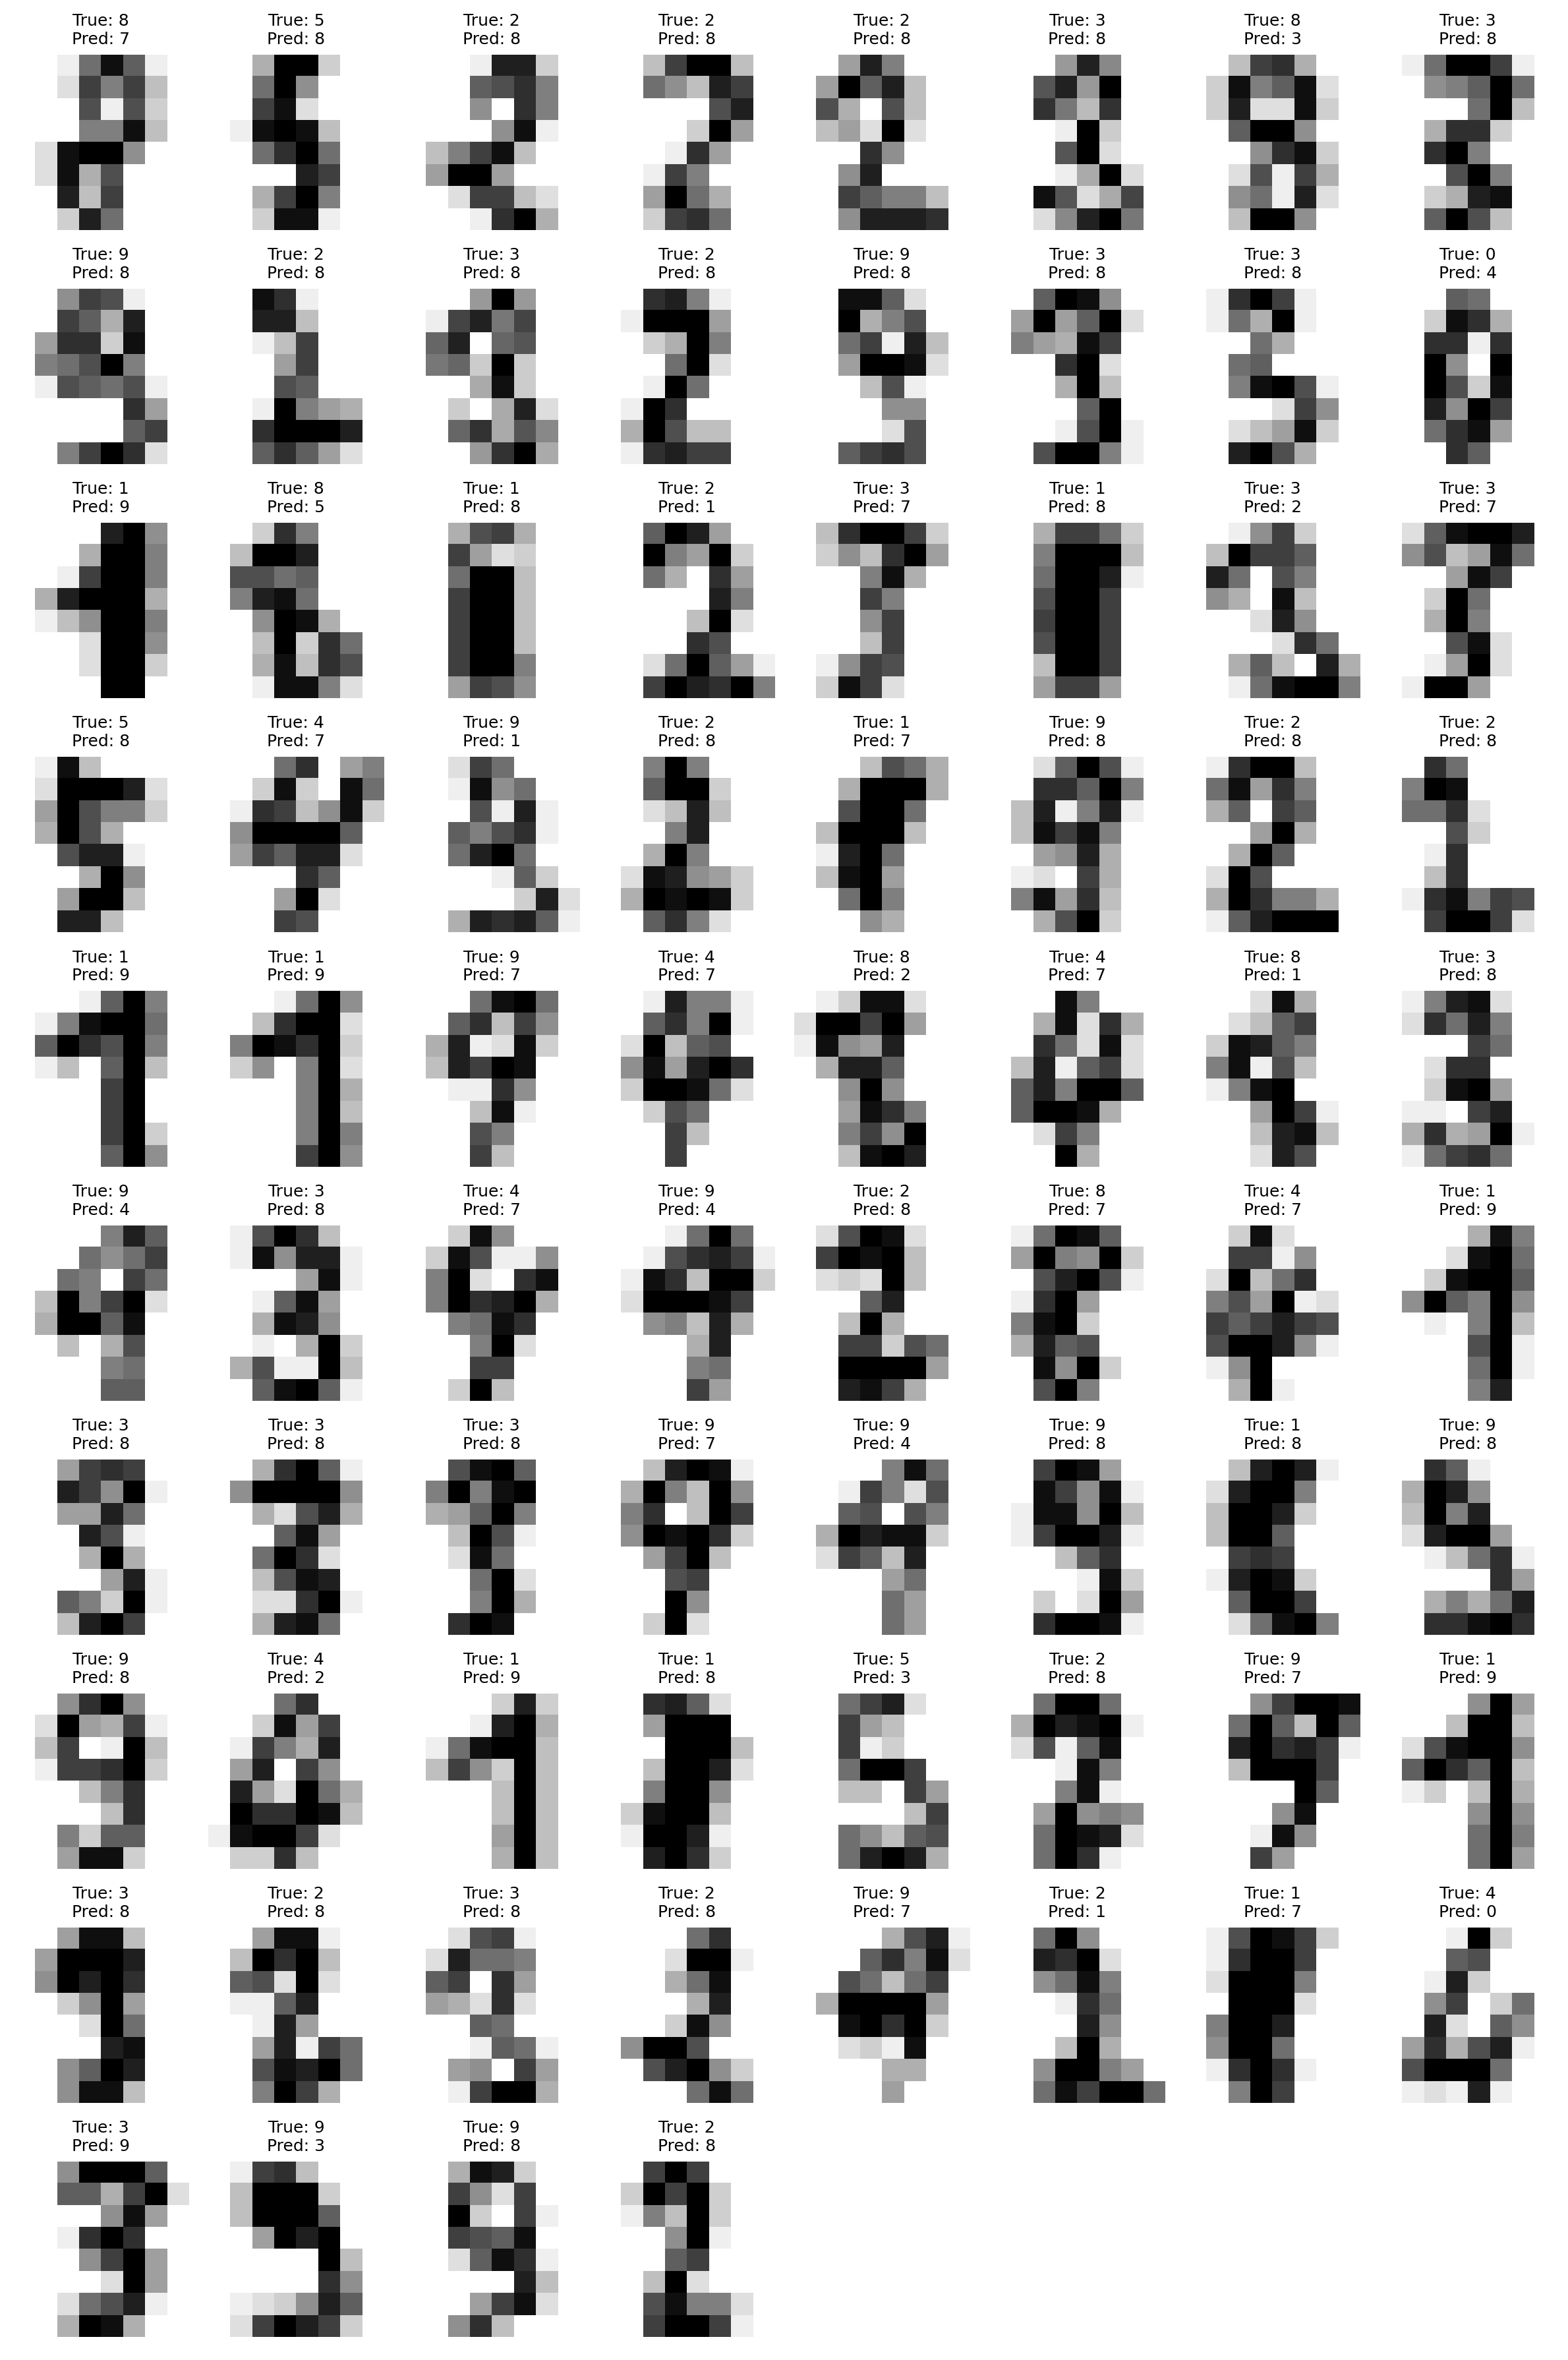

In [ ]:
# Plot all misclassified digits
misclassified_indices = index[0]  # Extract the array from tuple
n_misclassified = len(misclassified_indices)

print(f"Total misclassified: {n_misclassified}\n")

# Calculate grid dimensions
n_cols = 8  # Number of columns in the grid
n_rows = (n_misclassified + n_cols - 1) // n_cols  # Ceiling division

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 1.5, n_rows * 1.8))
axes = axes.flatten() if n_misclassified > 1 else [axes]

# Plot each misclassified digit
for i, idx in enumerate(misclassified_indices):
    ax = axes[i]
    ax.imshow(X_test[idx].reshape(8, -1), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}", fontsize=9)
    ax.axis('off')

# Hide unused subplots
for i in range(n_misclassified, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

---

### PCA

Try to reduce the number of features through the ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)), by choosing, e.g., the 10 first principal components.

#### PCA and training/evaluation data selection

<span style="color:red">Implement your solution below</span>

#### Model training

<span style="color:red">Implement your solution below</span>

#### Evaluation

<span style="color:red">Implement your solution below</span>

---

### Cross-Validation

#### Data preparation

Use the function [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to implement cross-validation.

You may choose to do 10 splits (`cv=10`).

Choose as *scoring* `"f1_weighted"`, then the function will return the corresponding scores in an array.

By way of example and in order to be able to compare the results with the previous ones, the first application will be done on the entire dataset (which is usually not recommended).

<span style="color:red">Implement your solution below</span>

In [ ]:
SCORINGS = "f1_weighted"

Show the results with a [`plt.bar`] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) which includes an error bar `yerr` equal to 1 [standard deviation](https://numpy.org/doc/stable/reference/generated/numpy.std.html), as well as in a [`boxplot`](https://matplotlib.org/stable/api/_as_gen/ matplotlib.pyplot.boxplot.html).

<span style="color:red">Implement your solution below</span>

---

### Grid Search

This time, we are going to use cross-validation for one of its primary use: to validate the choice of hyperparameters.

We will use the class
[`model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to choose the best number of main components for the PCA.

This class makes it possible to test several hyperparameters (stored in a dictionary) and to test them via cross-validation (hence the CV in the name).

To do this, we no longer need to worry about creating the different subsets, the `GridSearchCV` class does it for us.

In [ ]:
param_grid = {"pca__n_components": [1, 2, 5, 10, 20, 30, 40, 60]}

We're going to use a [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to do PCA compression and training with the model together, which will allow us to modify the hyperparameters at any step of the process through a single command.

We will have to use the exact names of the hyperparameters to modify in the dictionary, preceded by the name of the module and a double *underscore* (e.g., here: `"pca__"`), in order to be able to assign them to the right step of the `pipeline`.

<span style="color:red">Implement your solution below</span>

In [ ]:
# Define the pipeline

In [ ]:
# Define the gridsearch using the pipeline and fit the model

In [ ]:
# Print the best prediction score obtained
# and its corresponding hyperparameter value

In [ ]:
# Plot a bar plot (or boxplot) showing the different prediction scores
# for each tested hyperparameter
# (including the error bars if bar plots are chosen)

## Further exercises

Using the `.predict_proba` method of` linear_model.LogisticRegression`, use the result of the prediction to select a particular threshold (*threshold*) to influence the classification performances.

*   Can you get 100% [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)?
*   Can you get 100% of [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)?
*   Measure the values of [f1-scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and comment.
*   Plot the [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) from multiple threshold values.
*   Compare the [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) (area under the ROC curve) of the `linear_model.LogisticRegression` and of `naive_bayes. GaussianNB()`.

<span style="color:red">Implement your solution below and comment briefly</span>

---